In [1]:
from multiclassificationmodel import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### X_train and y_train

In [3]:
x_train = data.drop(columns='label')
y_train = data['label']
x_train, y_train

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 41995       0       0       0       0       0       0       0       0       0   
 41996       0       0       0       0       0       0       0       0       0   
 41997       0       0       0       0       0       0       0       0       0   
 41998       0       0       0       0       0       0       0       0       0   
 41999       0       0       0       0       0       0       0       0       0   
 
        pixel9

### Take an sample and visualize 

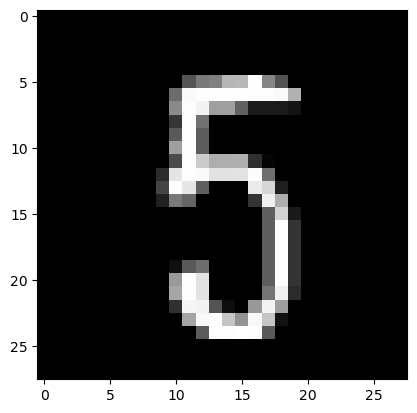

In [4]:
rand_id = np.random.randint(0, 42000)
sample = x_train.iloc[rand_id, :].to_numpy().reshape(28, 28)

plt.imshow(sample, cmap = 'gray')


### Convert x data to 0 and 1 (Black and White image)

In [6]:
def convert(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] > 0:
                img[i][j] = 1
    return img

def convert_data(x_train):
    for i in tqdm(range(len(x_train)), desc='converting data'):
        xi = x_train.iloc[i, :]
        img = np.array(xi).reshape(28, 28)
        con = convert(img)
        x_train.iloc[i, :] = np.array(con).reshape(784, )

In [7]:
convert_data(x_train)
x_train.iloc[0, :].unique()

converting data:   0%|          | 0/42000 [00:00<?, ?it/s]

converting data: 100%|██████████| 42000/42000 [00:10<00:00, 4064.81it/s]


array([0, 1], dtype=int64)

after convert

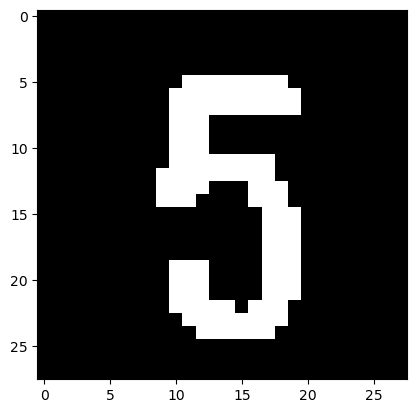

In [8]:
sample = x_train.iloc[rand_id, :].to_numpy().reshape(28, 28)
plt.imshow(sample, cmap = 'gray')

### One hot coding for y

In [9]:
def one_hot_coding(y_train):
    m = len(y_train.unique())
    y_new = []
    for i in y_train.values:
        y_n = [0] * m
        y_n[i] = 1
        y_new.append(y_n)
    y_new = pd.DataFrame(y_new)
    return y_new

y_train before one hot

In [10]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

y_train after one hot

In [11]:
y_train_one_hot = one_hot_coding(y_train)
y_train_one_hot.index = y_train
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0


### Caling the model

In [12]:
model = MultiClassification()

In [13]:
# model.empty_file() # uncomment this to empty weights and bias file for training 

In [14]:
if model.is_file_empty('weights.npy') or model.is_file_empty('bias.npy'):
    training = True
else:
    training = False
training

False

training

In [15]:
if training:
    model.empty_file()
    model.fit(x_train, y_train, learning_rate=[0.01, 0.001, 0.0001], batch_size=64, epochs=17000)
else: 
    model.get_weights_bias() 

Loading Weights and Bias


y predict

In [16]:
y_pred = model.predict(x_train)
comp = pd.DataFrame({'y predict' : y_pred,
                     'y train': y_train.to_numpy()})
comp

,y predict,y train
0,1,1
1,0,0
2,1,1
3,5,4
4,0,0
...,...,...
41995,0,0
41996,1,1
41997,7,7
41998,6,6


accuracy

In [17]:
acc = model.accuracy(y_train, y_pred)
print("accuracy training set :", acc)

accuracy training set : 0.9292619047619047


### Loss

In [18]:
y_pred_one_hot = one_hot_coding(pd.Series(y_pred))

In [19]:
loss = model.loss(y_train_one_hot.values, y_pred_one_hot.values)
print("loss training set :", loss)

loss training set : 1.9545658032253033


accuracy per 100 epochs

In [20]:
if training:
    epoch = np.arange(0, model.epochs, 100)
    plt.plot(epoch, model.accuracy_point)
    plt.plot(model.accuracy_point.index(max(model.accuracy_point)) * 100, max(model.accuracy_point), 'ro')
    plt.title('Accuracy per hundred epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.axis([0, model.epochs, 0.0, 1.0])
    plt.show()

loss per 100 epochs

In [21]:
if training:
    plt.plot(epoch, model.epoch_loss, label = 'Loss')
    plt.plot(model.epoch_loss.index(min(model.epoch_loss)) * 100, min(model.epoch_loss), 'ro')
    plt.title('Loss per hundred epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.axis([0, model.epochs, 0.0, max(model.epoch_loss)])
    plt.show()

### Test dataset

convert test set

In [22]:
x_test = pd.read_csv('test.csv')
convert_data(x_test)

converting data:   8%|▊         | 2327/28000 [00:00<00:06, 4192.01it/s]


KeyboardInterrupt: 

one hot y test

In [ ]:
y_test = pd.read_csv('submission.csv')
y_test = y_test['Label']
y_test_one_hot = one_hot_coding(y_test)
y_test_one_hot.index = y_test

predicting y test

In [ ]:
y_pred_test = model.predict(x_test)

#### accuracy test set

In [ ]:
acc_test = model.accuracy(y_test, y_pred_test)
print('accuracy test set :', acc_test)

accuracy test set : 0.8930357142857143


#### Loss test set

In [ ]:
loss_test = model.loss(y_test_one_hot.values, one_hot_coding(pd.Series(y_pred_test)).values)
print("loss test set:", loss_test)

loss test set: 2.955532437222536


In [ ]:
def predict_test_set():
    rand = np.random.randint(0, 28000)
    x_rand = x_test.iloc[rand, :]
    x_rand = np.array(x_rand).reshape(28, 28)
    plt.imshow(x_rand, cmap='gray')
    plt.show()
    y_pred = model.predict_single_point(x_rand.reshape(784, 1))
    print("y_predict :", y_pred)

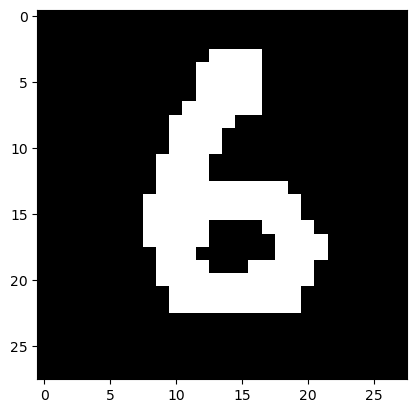

y_predict : 6


In [ ]:
predict_test_set()

### Compare to sklearn library

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
logreg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(x_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy train: {accuracy}")

y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy}")


Accuracy train: 0.9405238095238095
Accuracy test: 0.9081428571428571
